# **QAOA Algorithm and Tests**

Author: Alejandro Mata Ali (ITCL)

## Packages

In [1]:
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

from auxiliary_functions import generate_problem, brute_force_tsp_solver, tsp_qubo_formulation, compare_solutions, qubo_to_ising
from qaoa_functions import qubo_solver
from quantum_circuit import qaoa_results

# Generation of the instance

In [2]:
# Problem parameters
num_cities = 5
n_connections = num_cities  # Fully connected graph
distance_range = 10
restriction_value = 10  # Penalty parameter for constraint violations

# Generate TSP instance
print(f"Generating TSP problem with {num_cities} cities...", end='')
distance_matrix = generate_problem(num_cities, n_connections, distance_range)
print(f"\rDistance matrix shape: {distance_matrix.shape}"+" "*20)

# Convert to QUBO formulation
print("Converting TSP to QUBO formulation...", end='')
qubo_matrix = tsp_qubo_formulation(distance_matrix, restriction_value)
# Normalize QUBO matrix to avoid numerical issues
qubo_max = np.linalg.norm(qubo_matrix, 'fro')
if qubo_max > 0:
    qubo_matrix = qubo_matrix / qubo_max
    print(f"\rQUBO matrix normalized by factor: {qubo_max}"+" "*20)
else:
    print("\rQUBO matrix is zero, no normalization needed"+" "*20)

print(f"QUBO matrix shape: {qubo_matrix.shape}")

# Get optimal solution using brute force
print("Computing optimal solution using brute force...", end="")
bf_route, bf_distance = brute_force_tsp_solver(distance_matrix)
print(f"\rOptimal route: {' -> '.join(map(str, bf_route))}"+" "*20)
print(f"Optimal distance: {bf_distance}")

Distance matrix shape: (5, 5)                    
QUBO matrix normalized by factor: 178.0954800100216                    
QUBO matrix shape: (16, 16)
Optimal route: 3 -> 2 -> 1 -> 0 -> 4                    
Optimal distance: 9.0


Uniform probability:  1.52587890625e-05
Try  1  of  5
Try  2  of  5
Try  3  of  5
Try  4  of  5
Try  5  of  5


c:\Users\alejandro.mata\Documents\Bittbucket\quantum-algorithms\quantum_computing\qiskit2_qaoa_workshop\qaoa_functions.py:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


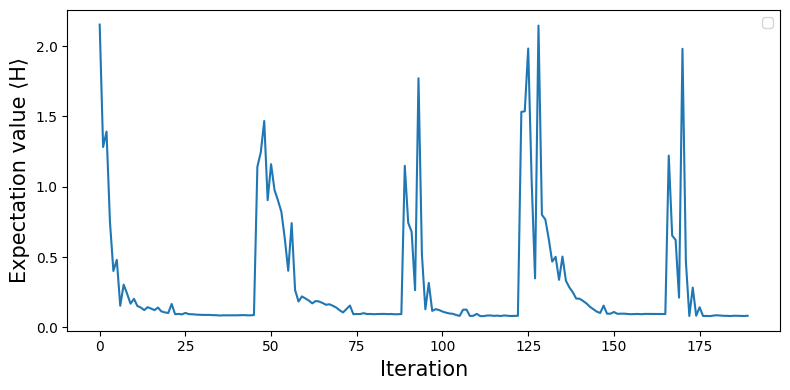

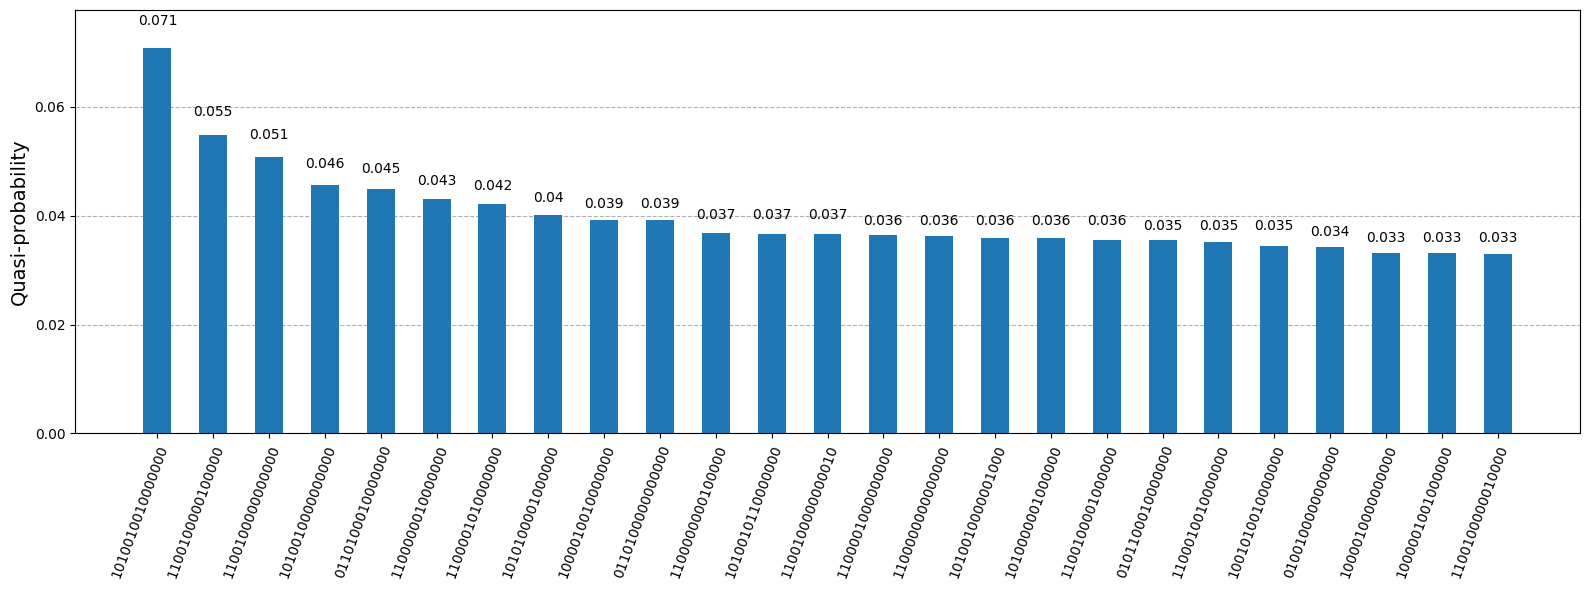

In [3]:
n_layers = 1
number_of_initializations = 5
number_of_shots = int(1e5)

print('Uniform probability: ', 1/2**((num_cities-1)**2))
backend = AerSimulator(device='CPU', max_parallel_shots=0, max_parallel_threads=0)
qaoa_solution = qubo_solver(qubo_matrix, n_layers, number_of_initializations, number_of_shots, backend=backend, folder='tsp')
# Evaluate results on quantum backend
counts = qaoa_results(qubo_to_ising(qubo_matrix), n_layers, qaoa_solution.x, backend, number_of_shots, statevector=True)
# Display histogram of measurement results
plot_histogram(counts, number_to_keep=num_cities**2, sort='value_desc', figsize=(16,6))

In [4]:
# Get the 10 most probable solutions from counts
top_10_solutions = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 solutions from QAOA:")
for i, (solution, probability) in enumerate(top_10_solutions):
    print(f"{i+1}. Solution: {solution}, Probability: {probability:.4f}")
    try:
        compare_solutions(distance_matrix, qubo_matrix, solution)
        print()
    except Exception as e:
        print(f"Error analyzing solution {solution}: {e}")
        print()

Top 10 solutions from QAOA:
1. Solution: 1010010010000000, Probability: 0.0021
=== BRUTE FORCE SOLUTION ===
Optimal route: 3 -> 2 -> 1 -> 0 -> 4
Optimal distance: 9.0

=== QUBO SOLUTION ===
QUBO binary solution: 0001001001001000
QUBO route: 3 -> 2 -> 1 -> 0 -> 4
QUBO distance: 9.0
QUBO cost: -0.3986625600829665
QUBO approximation ratio: 1.0000
QUBO quality: 100.00% of optimal

=== QAOA SOLUTION ===
Repetition constraint: [[1 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 0]]
QAOA route: -1 -> 1 -> 0 -> -1 -> 4
QAOA distance: inf

QAOA solution is invalid

2. Solution: 1100100000100000, Probability: 0.0016
=== BRUTE FORCE SOLUTION ===
Optimal route: 3 -> 2 -> 1 -> 0 -> 4
Optimal distance: 9.0

=== QUBO SOLUTION ===
QUBO binary solution: 0001001001001000
QUBO route: 3 -> 2 -> 1 -> 0 -> 4
QUBO distance: 9.0
QUBO cost: -0.3986625600829665
QUBO approximation ratio: 1.0000
QUBO quality: 100.00% of optimal

=== QAOA SOLUTION ===
Repetition constraint: [[1 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 0]]
QAOA r

Uniform probability:  1.52587890625e-05
Try  1  of  5
Try  2  of  5
Try  3  of  5
Try  4  of  5
Try  5  of  5


c:\Users\alejandro.mata\Documents\Bittbucket\quantum-algorithms\quantum_computing\qiskit2_qaoa_workshop\qaoa_functions.py:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


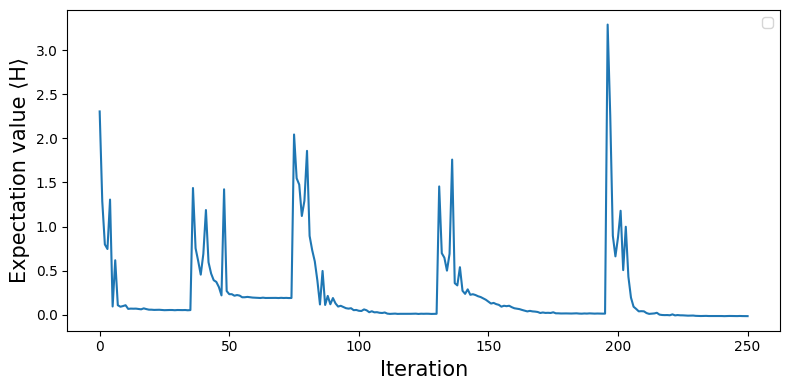

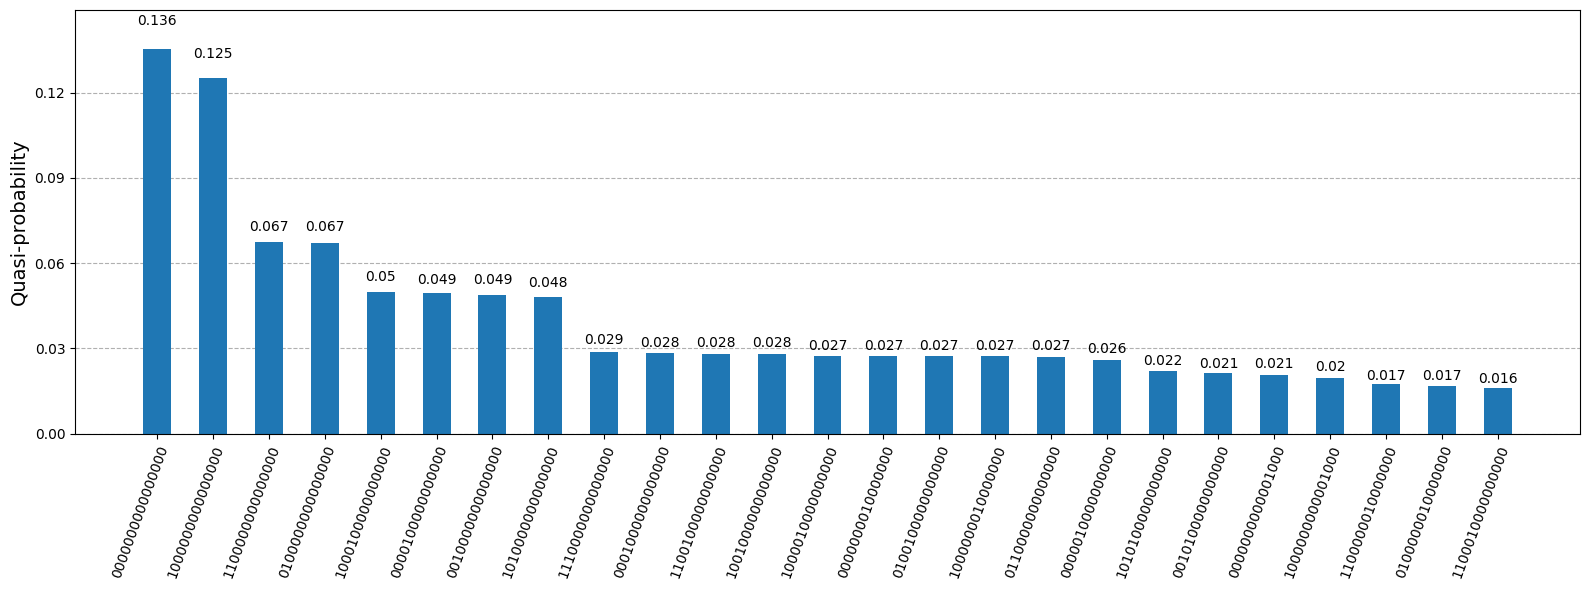

In [5]:
n_layers = 2
number_of_initializations = 5
number_of_shots = int(1e5)

print('Uniform probability: ', 1/2**((num_cities-1)**2))
backend = AerSimulator(device='CPU', max_parallel_shots=0, max_parallel_threads=0)
qaoa_solution = qubo_solver(qubo_matrix, n_layers, number_of_initializations, number_of_shots, backend=backend, folder='tsp')
# Evaluate results on quantum backend
counts = qaoa_results(qubo_to_ising(qubo_matrix), n_layers, qaoa_solution.x, backend, number_of_shots, statevector=True)
# Display histogram of measurement results
plot_histogram(counts, number_to_keep=num_cities**2, sort='value_desc', figsize=(16,6))

In [6]:
# Get the 10 most probable solutions from counts
top_10_solutions = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 solutions from QAOA:")
for i, (solution, probability) in enumerate(top_10_solutions):
    print(f"{i+1}. Solution: {solution}, Probability: {probability:.4f}")
    try:
        compare_solutions(distance_matrix, qubo_matrix, solution)
        print()
    except Exception as e:
        print(f"Error analyzing solution {solution}: {e}")
        print()

Top 10 solutions from QAOA:
1. Solution: 0000000000000000, Probability: 0.0430
=== BRUTE FORCE SOLUTION ===
Optimal route: 3 -> 2 -> 1 -> 0 -> 4
Optimal distance: 9.0

=== QUBO SOLUTION ===
QUBO binary solution: 0001001001001000
QUBO route: 3 -> 2 -> 1 -> 0 -> 4
QUBO distance: 9.0
QUBO cost: -0.3986625600829665
QUBO approximation ratio: 1.0000
QUBO quality: 100.00% of optimal

=== QAOA SOLUTION ===
QAOA route: -1 -> -1 -> -1 -> -1 -> 4
QAOA distance: inf

QAOA solution is invalid

2. Solution: 1000000000000000, Probability: 0.0398
=== BRUTE FORCE SOLUTION ===
Optimal route: 3 -> 2 -> 1 -> 0 -> 4
Optimal distance: 9.0

=== QUBO SOLUTION ===
QUBO binary solution: 0001001001001000
QUBO route: 3 -> 2 -> 1 -> 0 -> 4
QUBO distance: 9.0
QUBO cost: -0.3986625600829665
QUBO approximation ratio: 1.0000
QUBO quality: 100.00% of optimal

=== QAOA SOLUTION ===
QAOA route: 0 -> -1 -> -1 -> -1 -> 4
QAOA distance: inf

QAOA solution is invalid

3. Solution: 1100000000000000, Probability: 0.0214
=== BR

Uniform probability:  1.52587890625e-05
Try  1  of  5
Try  2  of  5
Try  3  of  5
Try  4  of  5
Try  5  of  5


c:\Users\alejandro.mata\Documents\Bittbucket\quantum-algorithms\quantum_computing\qiskit2_qaoa_workshop\qaoa_functions.py:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


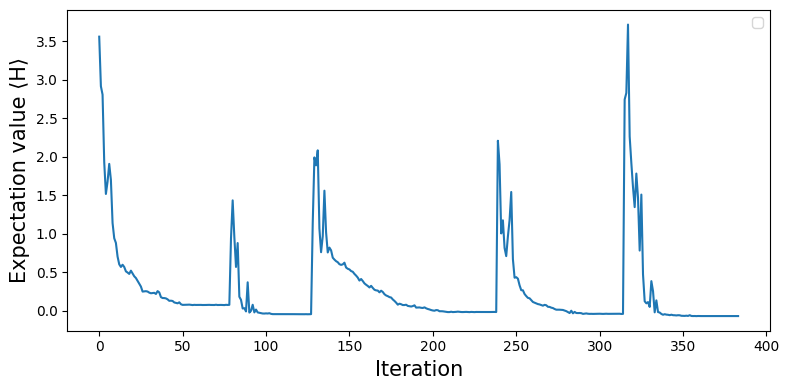

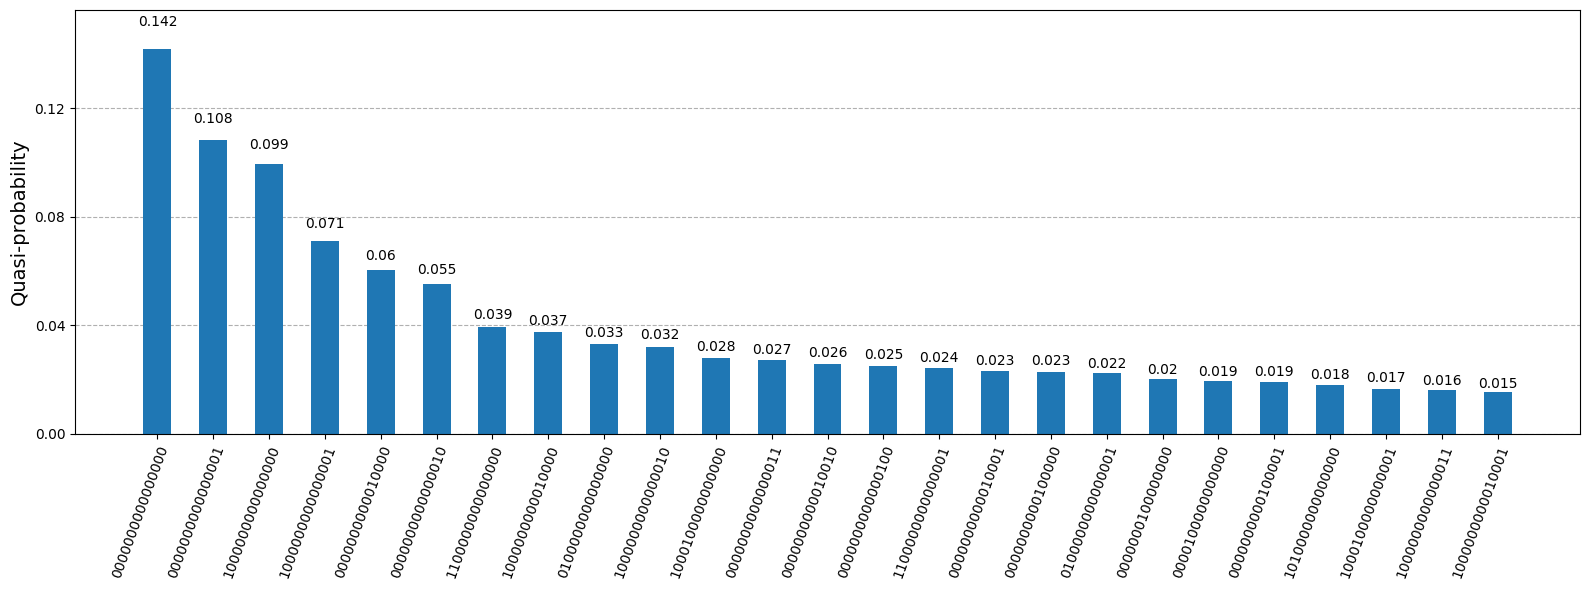

In [7]:
n_layers = 3
number_of_initializations = 5
number_of_shots = int(1e5)

print('Uniform probability: ', 1/2**((num_cities-1)**2))
backend = AerSimulator(device='CPU', max_parallel_shots=0, max_parallel_threads=0)
qaoa_solution = qubo_solver(qubo_matrix, n_layers, number_of_initializations, number_of_shots, backend=backend, folder='tsp')
# Evaluate results on quantum backend
counts = qaoa_results(qubo_to_ising(qubo_matrix), n_layers, qaoa_solution.x, backend, number_of_shots, statevector=True)
# Display histogram of measurement results
plot_histogram(counts, number_to_keep=num_cities**2, sort='value_desc', figsize=(16,6))

In [8]:
# Get the 10 most probable solutions from counts
top_10_solutions = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 solutions from QAOA:")
for i, (solution, probability) in enumerate(top_10_solutions):
    print(f"{i+1}. Solution: {solution}, Probability: {probability:.4f}")
    try:
        compare_solutions(distance_matrix, qubo_matrix, solution)
        print()
    except Exception as e:
        print(f"Error analyzing solution {solution}: {e}")
        print()

Top 10 solutions from QAOA:
1. Solution: 0000000000000000, Probability: 0.0584
=== BRUTE FORCE SOLUTION ===
Optimal route: 3 -> 2 -> 1 -> 0 -> 4
Optimal distance: 9.0

=== QUBO SOLUTION ===
QUBO binary solution: 0001001001001000
QUBO route: 3 -> 2 -> 1 -> 0 -> 4
QUBO distance: 9.0
QUBO cost: -0.3986625600829665
QUBO approximation ratio: 1.0000
QUBO quality: 100.00% of optimal

=== QAOA SOLUTION ===
QAOA route: -1 -> -1 -> -1 -> -1 -> 4
QAOA distance: inf

QAOA solution is invalid

2. Solution: 0000000000000001, Probability: 0.0446
=== BRUTE FORCE SOLUTION ===
Optimal route: 3 -> 2 -> 1 -> 0 -> 4
Optimal distance: 9.0

=== QUBO SOLUTION ===
QUBO binary solution: 0001001001001000
QUBO route: 3 -> 2 -> 1 -> 0 -> 4
QUBO distance: 9.0
QUBO cost: -0.3986625600829665
QUBO approximation ratio: 1.0000
QUBO quality: 100.00% of optimal

=== QAOA SOLUTION ===
QAOA route: -1 -> -1 -> -1 -> 3 -> 4
QAOA distance: inf

QAOA solution is invalid

3. Solution: 1000000000000000, Probability: 0.0409
=== BR

Uniform probability:  1.52587890625e-05
Try  1  of  5
Try  2  of  5
Try  3  of  5
Try  4  of  5
Try  5  of  5


c:\Users\alejandro.mata\Documents\Bittbucket\quantum-algorithms\quantum_computing\qiskit2_qaoa_workshop\qaoa_functions.py:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


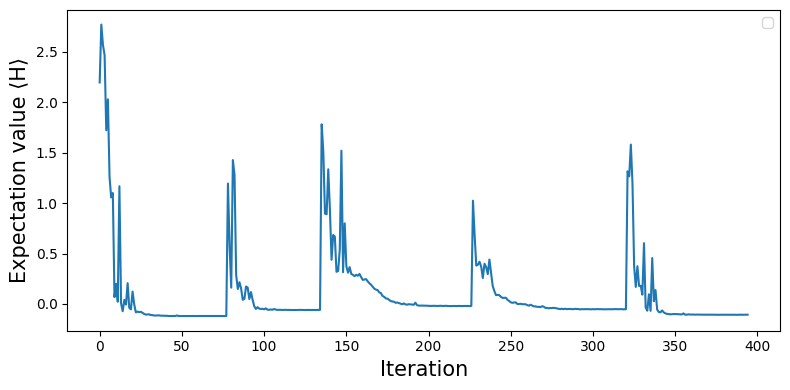

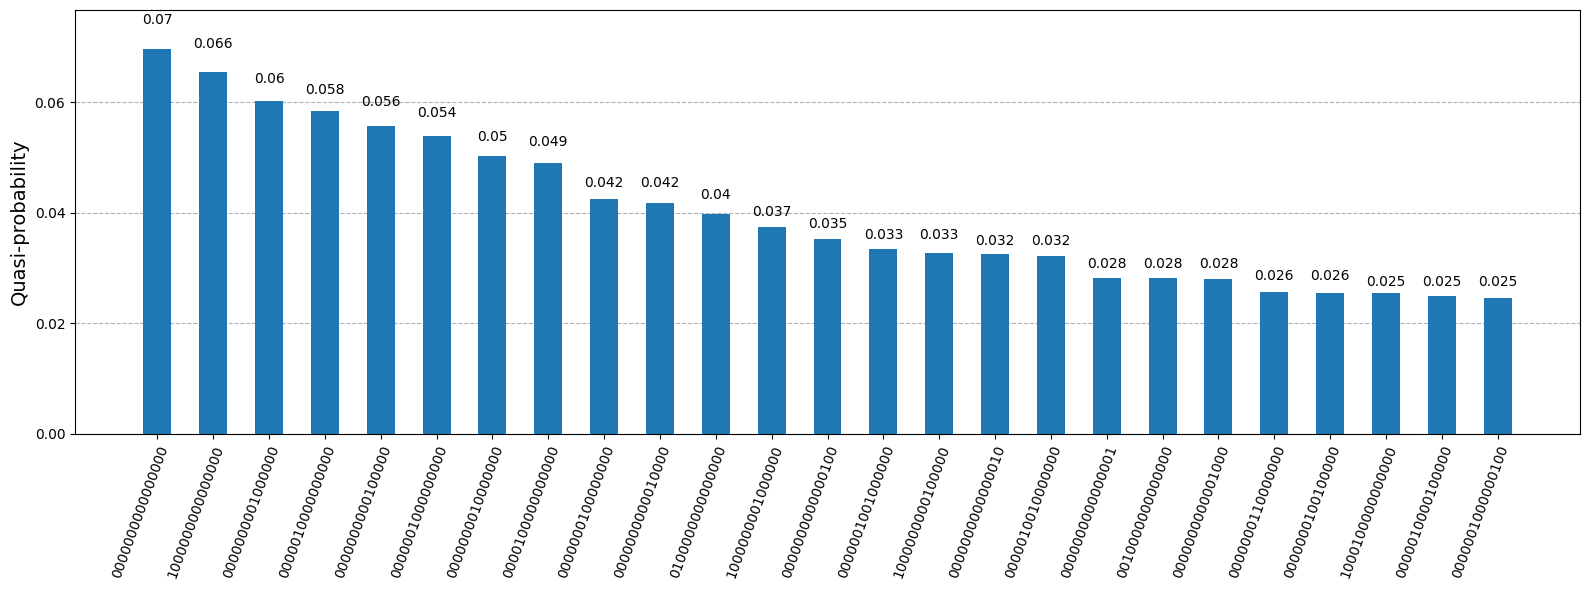

In [9]:
n_layers = 4
number_of_initializations = 5
number_of_shots = int(1e5)

print('Uniform probability: ', 1/2**((num_cities-1)**2))
backend = AerSimulator(device='CPU', max_parallel_shots=0, max_parallel_threads=0)
qaoa_solution = qubo_solver(qubo_matrix, n_layers, number_of_initializations, number_of_shots, backend=backend, folder='tsp')
# Evaluate results on quantum backend
counts = qaoa_results(qubo_to_ising(qubo_matrix), n_layers, qaoa_solution.x, backend, number_of_shots, statevector=True)
# Display histogram of measurement results
plot_histogram(counts, number_to_keep=num_cities**2, sort='value_desc', figsize=(16,6))

In [10]:
# Get the 10 most probable solutions from counts
top_10_solutions = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 solutions from QAOA:")
for i, (solution, probability) in enumerate(top_10_solutions):
    print(f"{i+1}. Solution: {solution}, Probability: {probability:.4f}")
    try:
        compare_solutions(distance_matrix, qubo_matrix, solution)
        print()
    except Exception as e:
        print(f"Error analyzing solution {solution}: {e}")
        print()

Top 10 solutions from QAOA:
1. Solution: 0000000000000000, Probability: 0.0139
=== BRUTE FORCE SOLUTION ===
Optimal route: 3 -> 2 -> 1 -> 0 -> 4
Optimal distance: 9.0

=== QUBO SOLUTION ===
QUBO binary solution: 0001001001001000
QUBO route: 3 -> 2 -> 1 -> 0 -> 4
QUBO distance: 9.0
QUBO cost: -0.3986625600829665
QUBO approximation ratio: 1.0000
QUBO quality: 100.00% of optimal

=== QAOA SOLUTION ===
QAOA route: -1 -> -1 -> -1 -> -1 -> 4
QAOA distance: inf

QAOA solution is invalid

2. Solution: 1000000000000000, Probability: 0.0130
=== BRUTE FORCE SOLUTION ===
Optimal route: 3 -> 2 -> 1 -> 0 -> 4
Optimal distance: 9.0

=== QUBO SOLUTION ===
QUBO binary solution: 0001001001001000
QUBO route: 3 -> 2 -> 1 -> 0 -> 4
QUBO distance: 9.0
QUBO cost: -0.3986625600829665
QUBO approximation ratio: 1.0000
QUBO quality: 100.00% of optimal

=== QAOA SOLUTION ===
QAOA route: 0 -> -1 -> -1 -> -1 -> 4
QAOA distance: inf

QAOA solution is invalid

3. Solution: 0000000001000000, Probability: 0.0120
=== BR

Uniform probability:  1.52587890625e-05
Try  1  of  5
Try  2  of  5
Try  3  of  5
Try  4  of  5
Try  5  of  5


c:\Users\alejandro.mata\Documents\Bittbucket\quantum-algorithms\quantum_computing\qiskit2_qaoa_workshop\qaoa_functions.py:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


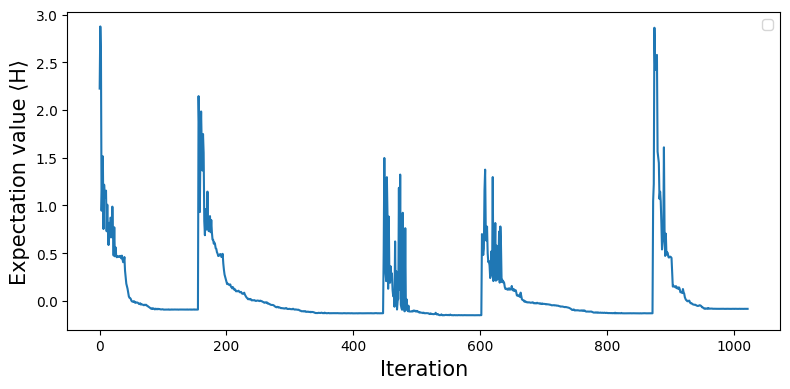

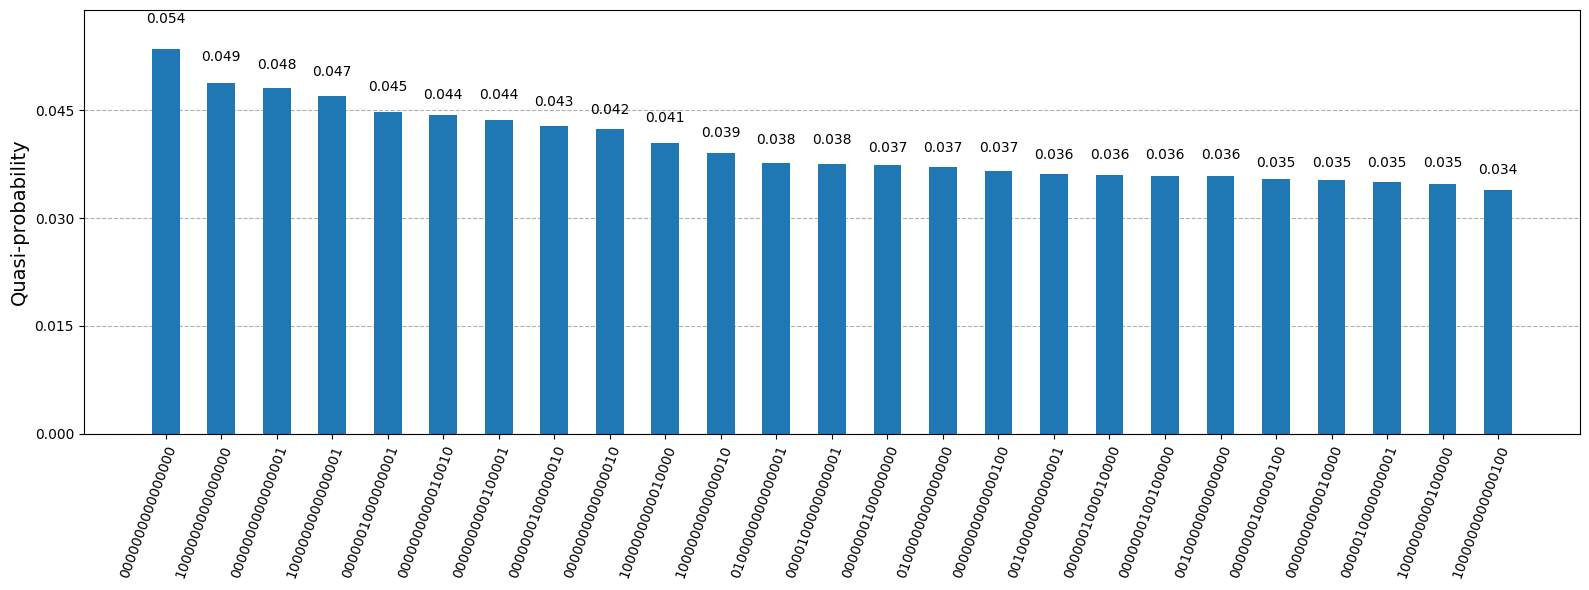

In [11]:
n_layers = 8
number_of_initializations = 5
number_of_shots = int(1e5)

print('Uniform probability: ', 1/2**((num_cities-1)**2))
backend = AerSimulator(device='CPU', max_parallel_shots=0, max_parallel_threads=0)
qaoa_solution = qubo_solver(qubo_matrix, n_layers, number_of_initializations, number_of_shots, backend=backend, folder='tsp')
# Evaluate results on quantum backend
counts = qaoa_results(qubo_to_ising(qubo_matrix), n_layers, qaoa_solution.x, backend, number_of_shots, statevector=True)
# Display histogram of measurement results
plot_histogram(counts, number_to_keep=num_cities**2, sort='value_desc', figsize=(16,6))

In [12]:
# Get the 10 most probable solutions from counts
top_10_solutions = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 solutions from QAOA:")
for i, (solution, probability) in enumerate(top_10_solutions):
    print(f"{i+1}. Solution: {solution}, Probability: {probability:.4f}")
    try:
        compare_solutions(distance_matrix, qubo_matrix, solution)
        print()
    except Exception as e:
        print(f"Error analyzing solution {solution}: {e}")
        print()

Top 10 solutions from QAOA:
1. Solution: 0000000000000000, Probability: 0.0061
=== BRUTE FORCE SOLUTION ===
Optimal route: 3 -> 2 -> 1 -> 0 -> 4
Optimal distance: 9.0

=== QUBO SOLUTION ===
QUBO binary solution: 0001001001001000
QUBO route: 3 -> 2 -> 1 -> 0 -> 4
QUBO distance: 9.0
QUBO cost: -0.3986625600829665
QUBO approximation ratio: 1.0000
QUBO quality: 100.00% of optimal

=== QAOA SOLUTION ===
QAOA route: -1 -> -1 -> -1 -> -1 -> 4
QAOA distance: inf

QAOA solution is invalid

2. Solution: 1000000000000000, Probability: 0.0056
=== BRUTE FORCE SOLUTION ===
Optimal route: 3 -> 2 -> 1 -> 0 -> 4
Optimal distance: 9.0

=== QUBO SOLUTION ===
QUBO binary solution: 0001001001001000
QUBO route: 3 -> 2 -> 1 -> 0 -> 4
QUBO distance: 9.0
QUBO cost: -0.3986625600829665
QUBO approximation ratio: 1.0000
QUBO quality: 100.00% of optimal

=== QAOA SOLUTION ===
QAOA route: 0 -> -1 -> -1 -> -1 -> 4
QAOA distance: inf

QAOA solution is invalid

3. Solution: 0000000000000001, Probability: 0.0055
=== BR